In [1]:
import pandas as pd
import numpy as np 
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from collections import Counter
from pyspark import SparkContext

### Load Data 

In [2]:
sc = SparkContext()

In [3]:
rdd = sc.textFile('./Data/sample_data_1M.json').cache()

In [4]:
# convert to json format
def convert_json(raw):
    return json.loads(raw)

rdd=rdd.map(convert_json)

In [5]:
print('Total number of datasets:',rdd.count())

# sample data
rdd.first()

Total number of datasets: 1000000


{'overall': 5.0,
 'vote': None,
 'verified': True,
 'reviewTime': '07 15, 2016',
 'reviewerID': 'A2KNKGKEDKKVYK',
 'asin': 'B008M61DU0',
 'style': {'Size:': ' Large', 'Color:': ' Green'},
 'reviewerName': 'Pattie',
 'reviewText': 'My husband lived it.  I sent one down to my Gran daughter in fl.  She showed it off to all her softball team.  She was surprised & proud to wear Ireland.',
 'summary': 'My husband lived it. I sent one down to ...',
 'unixReviewTime': 1468540800,
 'image': None}

### check null values

In [6]:
keys = list(rdd.first().keys())
none_count={}
for k in keys:
    none_count[k]=rdd.filter(lambda x: x[k]==None or x[k]=='').count()

In [7]:
pd.DataFrame(list(none_count.items()),columns=['Value', 'Count'])

,Value,Count
0,overall,0
1,vote,905390
2,verified,0
3,reviewTime,0
4,reviewerID,0
5,asin,0
6,style,162926
7,reviewerName,83
8,reviewText,873
9,summary,423


### number of data for each year 

In [8]:
rdd_year=rdd.map(lambda x: int(x['reviewTime'][-4:]))

In [9]:
year = rdd_year.collect()

In [10]:
year_count_list= sorted(list(dict(Counter(year)).items()))

In [11]:
pd.DataFrame(year_count_list,columns=['Year', 'Count'])

,Year,Count
0,2003,2
1,2005,9
2,2006,48
3,2007,262
4,2008,741
5,2009,1316
6,2010,2382
7,2011,5003
8,2012,14640
9,2013,53705


### Check review length

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

In [15]:
review_text = rdd.map(lambda x: x['reviewText'])\
                 .map(lambda x: '' if x==None else x)\
                 .map(lambda x: len(x.split()))

In [16]:
review_length = review_text.collect()

In [25]:
review_length_list= sorted(list(dict(Counter(review_length)).values()))

In [49]:
range_list = range(0,110,10)
length={}
for i in range(11):
    if i == 10:
        min_ = range_list[i]
        key = '>{}'.format(min_)
        length[key] = len([c for c in review_length_list if c > min_ ]) 
    else:
        min_ = range_list[i]
        max_ = range_list[i+1]
        key = '{}-{}'.format(min_,max_)
        length[key] = len([c for c in review_length_list if c > min_ & c <= max_ ]) 

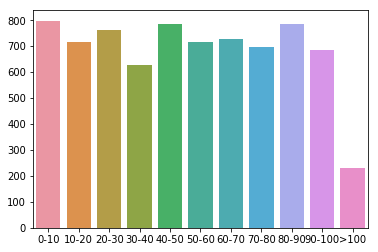

In [59]:
import seaborn as sns

sns.barplot(list(length.keys()), list(length.values()))